### Task 4
### Day 5 | June 27th 2025 
 

## <span style="color:maroon"> **Metabolic Data Analysis and Visualization with Python**


## Data Visualization :
>Designing and creating graphic or visual representations of a large amount of complex quantitative and qualitative data and information.

## Importing libraries 
- *Pandas:* Provides high-performance, easy-to-use data structures and data analysis tools.
- *Matplotlib and Seaborn:* Used for Data visualization.
- *Plotly:* Provides interactive web-based visuals. 

In [290]:
#After installing libraries, we need to import them to use in the notebook. 
import pandas as pd
import seaborn as sns 
import matplotlib as plt 
import plotly.express as px

#### DataFrame is a 2-dimensional data structure that can store data of different types.
(including characters, integers, floating point values, categorical data and more) in columns. 

>Dictionary and Dataframes are almost similar.
>
>In Dataframes the size of every array must be same.
>
>Dictionary keys in dataframes are called: Column Headers.
>
>Dictionary values in dataframes are called: Column values.

## 1.Loading the Datset 
Loading the dataset to our notebook, and storing it as the variable "df" 

In [293]:
df = pd.read_csv('metabolic_dataset.csv')       #using pd.read_csv () to load dataset. (dataset can also be created)

## Displaying the Dataset 
- Displaying the dataset, to see the no. of columns, types of data in each category and take an overview of the data present. 

In [295]:
df.head(5)         #Using head to display the top of the df. 
                   #We can customize the number of rows to be displayed by giving a value. 

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM


In [296]:
df.tail(3)         #To display botton values. 

,Metabolite,Condition,Replicate,Concentration,Units
97,Metabolite10,Treatment,3,83.688874,μM
98,Metabolite10,Treatment,4,82.007579,μM
99,Metabolite10,Treatment,5,76.337747,μM


## Exploring the dataset 
- Displaying the dataset, showed us that total 100 row and 5 columns are present.
- It also shows each type of data present in the columns.
- Column in a dataframe is called series.

In [298]:
type(df)      #to find type of df

pandas.core.frame.DataFrame

In [299]:
df.info()                  #gives information of complete dataframe
                           #data type of each column is also given with non null count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Metabolite     100 non-null    object 
 1   Condition      100 non-null    object 
 2   Replicate      100 non-null    int64  
 3   Concentration  95 non-null     float64
 4   Units          100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


In [300]:
col1 =df["Metabolite"]     #selecting individual column from a dataset
col1                       #displays, columns, its length and datatype

0      Metabolite1
1      Metabolite1
2      Metabolite1
3      Metabolite1
4      Metabolite1
          ...     
95    Metabolite10
96    Metabolite10
97    Metabolite10
98    Metabolite10
99    Metabolite10
Name: Metabolite, Length: 100, dtype: object

In [301]:
df.shape        #another way of finding rows and columns. 

(100, 5)

## Handling missing values 
- Check for missing values in the Concentration column using.  
- Fill missing values with the median concentration for the respective Metabolite and Condition combination.  

In [384]:
def handle_missing_values(df):            #defining a function 

#Checking for missing values in the Concentration column
#using isna() to check missing values, and sum() to count them
#storing results in missing_values variable    
    missing_values = df['Concentration'].isna().sum()

#finding the median of concentration for each metabolite and its condition
    median = df.groupby(['Metabolite', 'Condition'])['Concentration'].median()    #using .group() 

#filled the missing values in concentration with median     
    df['Concentration'].fillna(df.groupby(['Metabolite', 'Condition'])['Concentration'].transform('median'), inplace=True)  
        
    return df         #returning the modified dataframe 

cleaned_df = handle_missing_values(df)   #calling function, df is passed as input, results are saved in a new variable 
cleaned_df.isnull().sum()                #showing a count of missing values 

C:\Users\hp\AppData\Local\Temp\ipykernel_12876\13627645.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Metabolite       0
Condition        0
Replicate        0
Concentration    0
Units            0
dtype: int64

In [386]:
cleaned_df.head(10)       #displaying our modified dataset for conformation 

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM
5,Metabolite1,Treatment,1,74.719990,μM
6,Metabolite1,Treatment,2,74.695486,μM
7,Metabolite1,Treatment,3,79.755659,μM
8,Metabolite1,Treatment,4,74.725770,μM
9,Metabolite1,Treatment,5,74.714210,μM


## 4.Standardizing Units 
- Standardize Units, Convert all concentrations to μM. For rows where Units is 'mM', multiply Concentration by 1000 and update Units to 'μM. 

In [388]:
#Converting all concentrations to μM

def standardize_units(cleaned_df):              #defining a function 
    cleaned_df.loc[cleaned_df['Units'] == 'mM', 'Concentration'] *= 1000   #using loc to select rows where unit is mM, multipllying the corresponding values by 1000, to convert in μM  
    return cleaned_df                           #return cleaned dataset 

perfect_df = standardize_units(cleaned_df)      #calling function and storing results to a new variable 
perfect_df                                      #displaying the dataset 

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM
...,...,...,...,...,...
95,Metabolite10,Treatment,1,94.497348,μM
96,Metabolite10,Treatment,2,81.219333,μM
97,Metabolite10,Treatment,3,83.688874,μM
98,Metabolite10,Treatment,4,82.007579,μM


## 5.Identifying and Handling Outliers  
o Detect outliers in Concentration.  
o Replace outliers with the median concentration of the respective Metabolite and Condition group.

In [396]:
def outlier_replacing(perfect_df):      #defining a function 

    #Finding outliers using IQR method 
    Q1 = perfect_df['Concentration'].quantile(0.25)   #calculating 25th percentile, finding values smaller than 25%
    Q3 = perfect_df['Concentration'].quantile(0.75)   #values above 75% 
    IQR = Q3 - Q1                          #calculating IQR , represents spread of middle 50% data, b/w 25 and 75 percent 

    #Calculating outlier boundaries, setting cutoffs 
    lower_bound = Q1 - 1.5 * IQR        #lower boundary, value below this is considered outlier 
    upper_bound = Q3 + 1.5 * IQR        #upper boundary, value above this is considered outlier 

    #Finding the outliers
    outlier_find = (perfect_df['Concentration'] < lower_bound) | (perfect_df['Concentration'] > upper_bound)   #using boolean, using OR operator, 
    print(f"Total outliers found {len(outlier_find)}")      #to print total no. of outliers found 

    #Calculating median for each Metabolite Condition group
    #Transform method returns a Series aligned with DataFrames index, each row getting median of its Metabolite, Condition group
    group_median = perfect_df.groupby(['Metabolite', 'Condition'])['Concentration'].transform('median')

    #wherever an outlier is found, its value is changed by the median. 
    perfect_df.loc[outlier_find, 'Concentration'] = group_median[outlier_find]
    return perfect_df

df2 = outlier_replacing(perfect_df)       #calling fn and storing result in a new variable 
df2

Total outliers found 100


,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM
...,...,...,...,...,...
95,Metabolite10,Treatment,1,94.497348,μM
96,Metabolite10,Treatment,2,81.219333,μM
97,Metabolite10,Treatment,3,83.688874,μM
98,Metabolite10,Treatment,4,82.007579,μM


## 6. Calculating summary statistics 
Computing the mean, median, and standard deviation of concentration for each 
Metabolite under each Condition.

Using .groupby() and .agg() for summary statistics. 

In [398]:
#grouped values and used .agg() for statistics 
stats_df = df2.groupby(['Metabolite', 'Condition'])['Concentration'].agg(['mean','std','median'])
stats_df

mean        std      median
Metabolite   Condition                                   
Metabolite1  Control     80.324499   4.464336   80.281301
             Treatment   75.722223   2.254788   74.719990
Metabolite10 Control     60.479187   4.457130   62.048568
             Treatment   83.550176   6.702451   82.007579
Metabolite2  Control     47.712037   3.698568   47.547589
             Treatment   49.955735   6.000106   50.356504
Metabolite3  Control     20.517690   2.788214   19.783831
             Treatment   43.169796   6.465101   42.719539
Metabolite4  Control     50.866943   3.847219   52.060923
             Treatment   49.301095   4.609969   48.900887
Metabolite5  Control     53.466520   3.522192   54.182185
             Treatment   53.651424   3.945831   54.218082
Metabolite6  Control     23.607715   5.674057   23.453450
             Treatment   26.432982   4.091046   25.621681
Metabolite7  Control    108.053252  57.759273  150.000000
             Treatment   30.793521   3.841770   29.971337
Metabolite8  Control     24.466194   3.404304   24.186280
             Treatment   25.168069   3.308173   25.104182
Metabolite9  Control     46.215224   1.144872   46.931744
             Treatment   44.303595   2.204139   43.912895

## 7. Group and Aggregate Data 
- Group the data by Metabolite and Condition, then calculate the mean 
Concentration for each group. 

In [312]:
#Grouping the data by metabolite and condition, then calculating the mean Concentration for each group.
grouped_mean = df2.groupby(['Metabolite', 'Condition'])['Concentration'].mean()
grouped_mean                           

Metabolite    Condition
Metabolite1   Control       80.324499
              Treatment     75.722223
Metabolite10  Control       60.479187
              Treatment     83.550176
Metabolite2   Control       47.712037
              Treatment     49.955735
Metabolite3   Control       20.517690
              Treatment     43.169796
Metabolite4   Control       50.866943
              Treatment     49.301095
Metabolite5   Control       53.466520
              Treatment     53.651424
Metabolite6   Control       23.607715
              Treatment     26.432982
Metabolite7   Control      108.053252
              Treatment     30.793521
Metabolite8   Control       24.466194
              Treatment     25.168069
Metabolite9   Control       46.215224
              Treatment     44.303595
Name: Concentration, dtype: float64

## 8. Visualizing the Data  
o Seaborn: Create a boxplot showing the distribution of Concentration for each 
Metabolite.   
o Matplotlib: Generate a bar plot of the mean Concentration for each 
Metabolite under different Conditions.  
o Plotly: Create an interactive line plot showing Concentration trends across 
Replicates for one specific Metabolite  

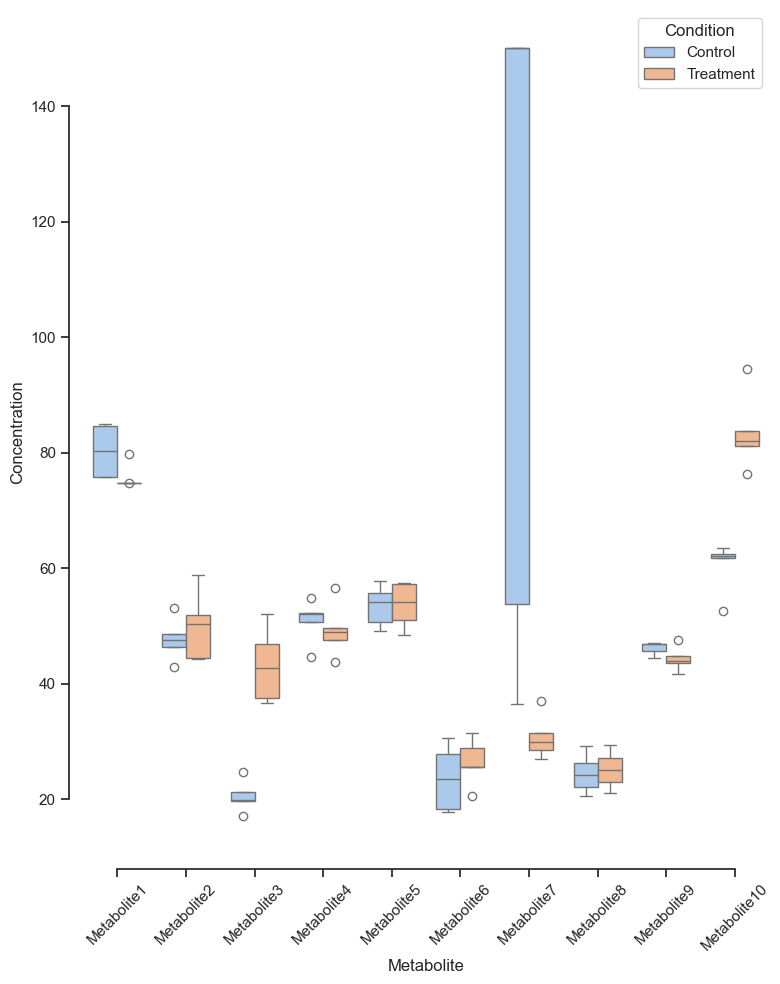

In [401]:
def concentration_boxplot(df2, output_file):
   import seaborn as sns
   import matplotlib.pyplot as plt
   
   sns.set_theme(style="ticks", palette="pastel")   #setting theme 
   
   #setting figure size, can be customized accordingly 
   plt.figure(figsize=(8, 10))
   
   #Drawing a boxplot, used addition wdith argument and customized the visualization 
   sns.boxplot(x="Metabolite", y="Concentration", hue="Condition", 
               data=df2, width=0.7)
   sns.despine(offset=10, trim=True)   #removing top and right borders of plot for a clean look 
   
   plt.xticks(rotation=45)            #rotating labels for readibility 
   plt.tight_layout()                 #adjusting layout 
   plt.show()                         #to display 
   plt.savefig(output_file, dpi=300)  #saving an an image, gives an output file, setting resolution to 300 
   plt.close() 
                                      #closing plot to prevent from overlapping with next plots 

plot_concentration_boxplot(df2, "concentration_boxplot.png")    #calling function and saving boxplot as an image 

C:\Users\hp\AppData\Local\Temp\ipykernel_12876\2847605485.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


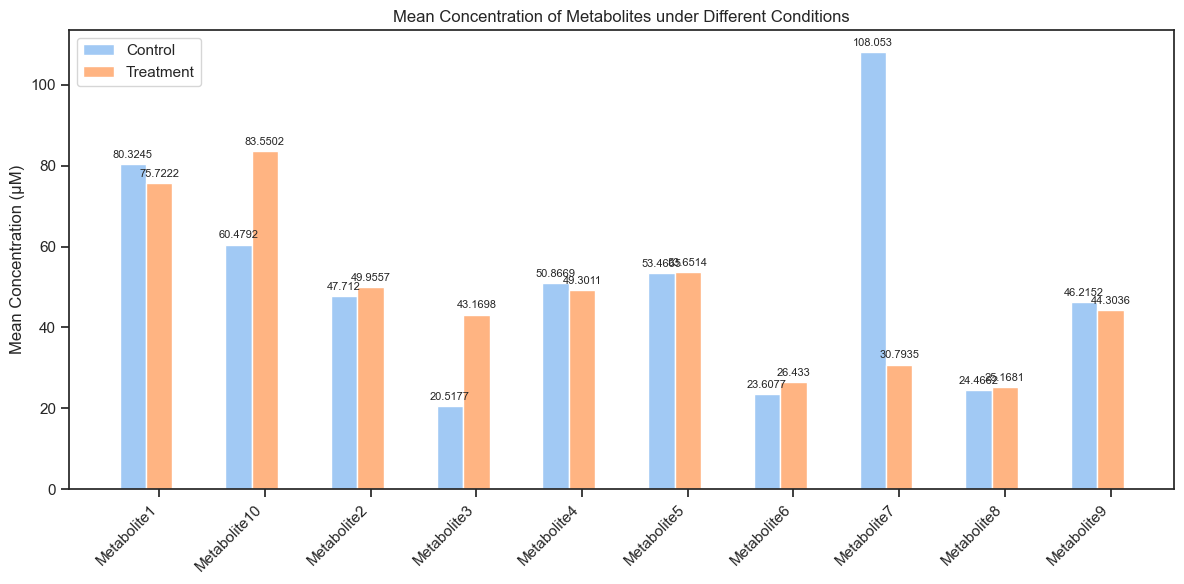

In [324]:
def plot_mean_concentrations(df, output_file):
    #Plotting bar chart of mean concentrations for each metabolite under different conditions
    import matplotlib.pyplot as plt
    import numpy as np
    
    #Calculating mean concentrations for each metabolite under different conditions
    metabolite_means = df.groupby(['Metabolite', 'Condition'])['Concentration'].mean().unstack()
    
    #Get unique metabolites and conditions
    metabolites = metabolite_means.index.tolist()
    conditions = metabolite_means.columns.tolist()
    
    x = np.arange(len(metabolites))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0
    
    fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')
    
    for condition in conditions:
        offset = width * multiplier
        values = metabolite_means[condition].values
        rects = ax.bar(x + offset, values, width, label=condition)
        ax.bar_label(rects, padding=3, fontsize=8)
        multiplier += 1
    
    # Add labels, title and custom x-axis tick labels
    ax.set_ylabel('Mean Concentration (µM)')
    ax.set_title('Mean Concentration of Metabolites under Different Conditions')
    ax.set_xticks(x + width, metabolites, rotation=45, ha='right')
    ax.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()
    plt.savefig(output_file, dpi=300)
    plt.close()


plot_mean_concentrations(df2, "mean_concentrations.png")

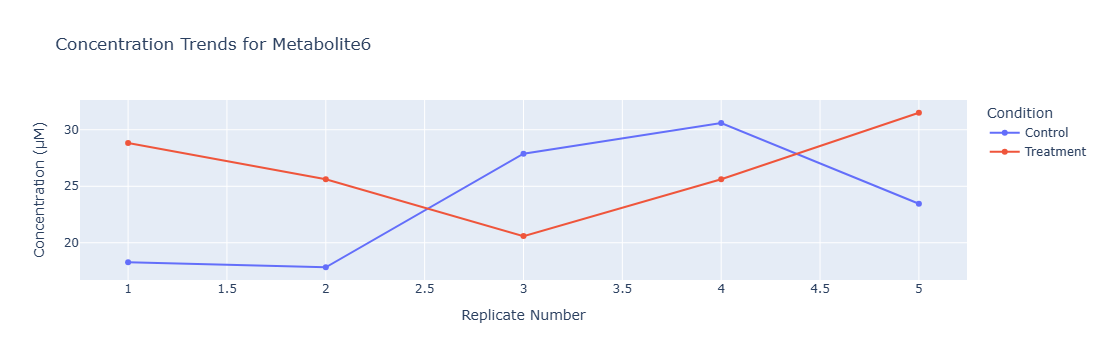

Interactive plot saved as metabolite_line_chart.html


In [344]:
def plot_metabolite_line_chart(df2, metabolite_name, output_file):
    #Creating interactive line plot showing concentration trends across replicates for a specific metabolite
    import plotly.express as px
    
    #Filtering data for the specific metabolite 
    metabolite_df = df2[df2['Metabolite'] == metabolite_name]
    
    #Creating line plot 
    fig = px.line(metabolite_df, 
                  x='Replicate', 
                  y='Concentration', 
                  color='Condition', 
                  markers=True,
                  title=f'Concentration Trends for {metabolite_name}',
                  labels={'Concentration': 'Concentration (µM)', 
                         'Replicate': 'Replicate Number'})
    
    fig.show()
    
    #Save as HTML file
    fig.write_html(output_file)
    print(f"Interactive plot saved as {output_file}")

available_metabolites = df2['Metabolite'].unique()
selected_metabolite = available_metabolites[5]  # Choose metabolite of choice
plot_metabolite_line_chart(df2, selected_metabolite, "metabolite_line_chart.html")